# 1. K-평균 알고리즘

군집화에서 가장 일반적으로 활용되는 알고리즘

군집 중심점(Centroid)라는 특정한 임의의 지점을 선택해 해당 중심에 가장 가까운 포인트들을 선택하는 군집화 기법

센트로이드는 해당 군집의 포인트의 평균 지점으로 이동하고, 이동된 센트로이드에서 다시 가까운 포인트를 선택, 다시 센트로이드 이동 등등 더이상 이동 없을 때까지 반복수행

- 알고리즘이 쉽고 간결하지만, 거리기반 알고리즘이기 때문에 속성의 수가 매우 많을 경우 정확도가 떨어진다(이를 위해 PCA 차원축소를 적용해야 할 수도 있음)

- 반복을 수행하는데, 반복 횟수가 많을 경우 수행시간이 매우 느려짐
- n_clusters : 센트로이드의 개수
- init : 초기 센트로이드를 설정할 방식. 일반적으로는 임의로 안정하고 'k-means++'방법으로 사용
- max_iter : 최대 반복 횟수. 이 이전에 센트로이드의 이동이 없어도 학습은 종료

In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

iris = load_iris()
irisdf = pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
irisdf.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [2]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(irisdf)     # kmeans는 비지도학습

C:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [4]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [5]:
irisdf['target'] = iris.target
irisdf['cluster'] = kmeans.labels_
iris_result = irisdf.groupby(['target', 'cluster'])['sepal_length'].count()
print(iris_result)

# target 0은 1번 군집으로, target 1은 0번 군집으로 어느정도 잘 분류되었으나 target2는 좀 분산됨

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


In [7]:
# 2차원 시각화
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisdf['pca_x'] = pca_transformed[:, 0]
irisdf['pca_y'] = pca_transformed[:, 1]
irisdf.head()

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,1,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,1,-2.728717,0.326755


Text(0.5, 1.0, '3 Clusters Visualization by 2 PCA Components')

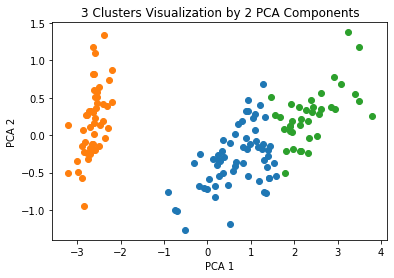

In [8]:
marker0_ind = irisdf[irisdf['cluster']==0].index
marker1_ind = irisdf[irisdf['cluster']==1].index
marker2_ind = irisdf[irisdf['cluster']==2].index

plt.scatter(x=irisdf.loc[marker0_ind, 'pca_x'], y=irisdf.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=irisdf.loc[marker1_ind, 'pca_x'], y=irisdf.loc[marker1_ind, 'pca_y'], marker='o')
plt.scatter(x=irisdf.loc[marker2_ind, 'pca_x'], y=irisdf.loc[marker2_ind, 'pca_y'], marker='o')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')

In [9]:
# 군집화 알고리즘 테스트를 위한 데이터 생성
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [12]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head()

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0
3,-1.448724,3.384245,2
4,1.214861,5.364896,0


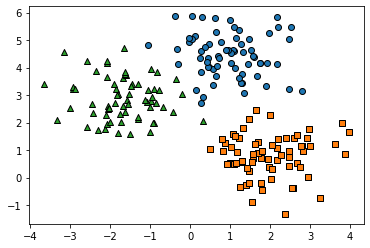

In [15]:
target_list = np.unique(y)
markers=['o', 's', '^', 'P', 'D', 'H', 'x']

for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target])

C:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


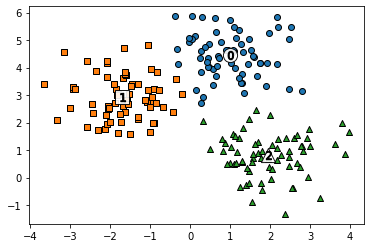

In [16]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label'] = cluster_labels

centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'P', 'D', 'H', 'x']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label'] == label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])
    
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white', alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)

In [17]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64


# 2. 군집 평가

실루엣 분석 : 각 군집간의 거리가 얼마나 효율적(군집간 거리는 떨어지고 군집내 거리는 밀착)으로 분리되었는지를 평가

실루엣 계수 $s(i) = {(b(i) - a(i)) \over (max(a(i), b(i)))}$

In [19]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisdf = pd.DataFrame(data=iris.data, columns=feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(irisdf)
irisdf['cluster'] = kmeans.labels_

score_samples = silhouette_samples(iris.data, irisdf['cluster'])
print('silhouette_samples() return 값의 shape', score_samples.shape)

irisdf['silhouette_coef'] = score_samples

average_score = silhouette_score(iris.data, irisdf['cluster'])
print('붓꽃 데이터 셋 Silhouette Analysis Score:{:.3f}'.format(average_score))

irisdf.groupby('cluster').silhouette_coef.mean()

C:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


silhouette_samples() return 값의 shape (150,)
붓꽃 데이터 셋 Silhouette Analysis Score:0.553


cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coef, dtype: float64

In [20]:
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

C:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

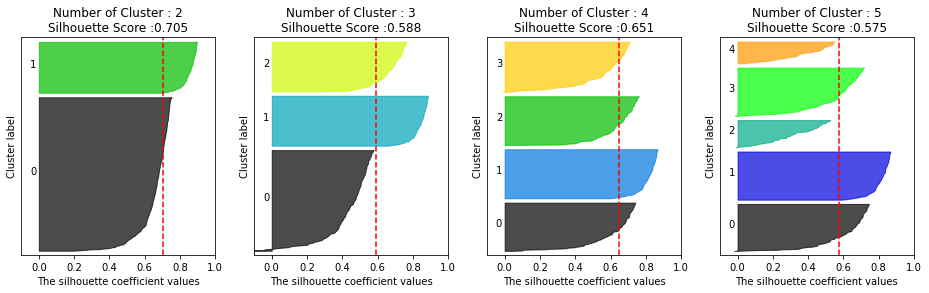

In [21]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, \
                  center_box=(-10.0, 10.0), shuffle=True, random_state=1)  

# cluster 개수를 2개, 3개, 4개, 5개 일때의 클러스터별 실루엣 계수 평균값을 시각화 
visualize_silhouette([ 2, 3, 4, 5], X)

C:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

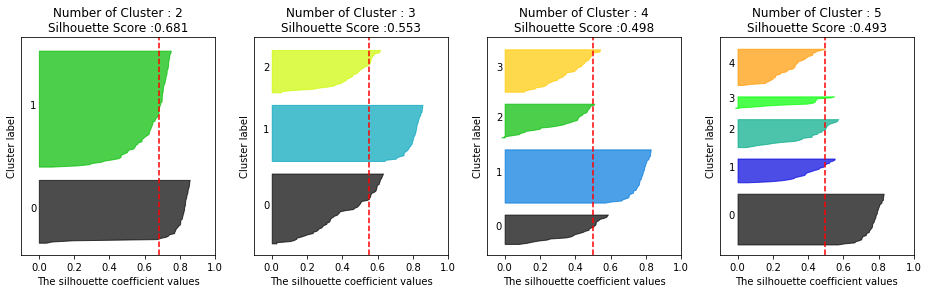

In [22]:
from sklearn.datasets import load_iris

iris=load_iris()
visualize_silhouette([ 2, 3, 4,5 ], iris.data)

# 3. 평균 이동

K-Mean은 센트로이드에 소속된 데이터의 평균거리 중심으로 이동하는데 반해, 평균이동은 데이터의 믿로가 가장 높은 곳으로 센트로이드를 이동

즉, 데이터의 분포도를 이용해 센트로이드를 찾는데 이 확률밀도를 찾기 위해서 KDE(Kernel Density Estimation)을 이용한다.

데이터셋을 특정 형태로 가정하지 않기 때문에 유연한 군집화 및 이상치의 영향력이 크지 않으며, 미리 군집의 개수를 정할 필요가 없다. 하지만 알고리즘의 수행시간이 오래걸리고 무엇보다도 bandwidth 값에 따른 군집화 영향도가 매우 크다. 그러므로 평균이동 기법은 보통 일반 데이터분석보다는 cv영역에서 많이 사용됨

In [23]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.7, random_state=0)

meanshift = MeanShift(bandwidth=0.8)     # bandwidth는 값이 작을 수록 데이터에 더 민감하게 반응해 과적합 위험
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5]


In [24]:
meanshift = MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


In [25]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)      # 최적의 bandwidth를 찾기
print('bandwidth 값:', round(bandwidth, 3))

bandwidth 값: 1.816


In [26]:
import pandas as pd

clusterdf = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterdf['target'] = y

best_bandwidth = estimate_bandwidth(X)

meanshift = MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


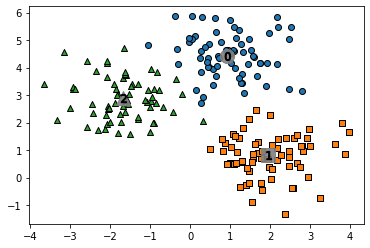

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label']  = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'x', '*']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label']==label]
    center_x_y = centers[label]
    # 군집별로 다른 마커로 산점도 적용
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label] )
    
    # 군집별 중심 표현
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)
    
plt.show()

In [28]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: meanshift_label, dtype: int64


# 4. GMM

GMM(Gaussian Mixture Model)은 데이터가 여러개의 가우시안 분포를 가진 집합들이 섞여서 생성된 것이라는 가정 하에 군집화 수행

가우시안분포 = 정규분포

In [29]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisdf = pd.DataFrame(data=iris.data, columns=feature_names)
irisdf['target'] = iris.target

In [30]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=0).fit(iris.data)     # n_components는 n_clusters와 동일 기능
gmm_cluster_labels = gmm.predict(iris.data)

irisdf['gmm_cluster'] = gmm_cluster_labels
iris_result = irisdf.groupby('target')['gmm_cluster'].value_counts()
print(iris_result)

target  gmm_cluster
0       0              50
1       2              45
        1               5
2       1              50
Name: gmm_cluster, dtype: int64


C:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [31]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(iris.data)
kmeans_cluster_labels = kmeans.predict(iris.data)
irisdf['kmeans_cluster'] = kmeans_cluster_labels
iris_result = irisdf.groupby('target')['kmeans_cluster'].value_counts()
print(iris_result)

C:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


target  kmeans_cluster
0       1                 50
1       0                 48
        2                  2
2       2                 36
        0                 14
Name: kmeans_cluster, dtype: int64


### GMM과 K-Means의 비교

데이터셋이 원형의 범위를 가질수록 KMeans의 군집화 효율은 더 높아지기 때문에 원형의 데이터의 경우 kmeans가 더 효과적일 수 있지만, 데이터가 길쭉한 타원형의 경우 등엔 효율적이지 못하다. 그리고 GMM은 수행시간이 오래걸린다.

In [32]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수  
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

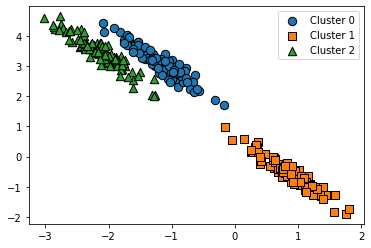

In [33]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)

clusterdf = pd.DataFrame(data=X_aniso, columns=['ftr1', 'ftr2'])
clusterdf['target'] = y

visualize_cluster_plot(None, clusterdf, 'target', iscenter=False)

C:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


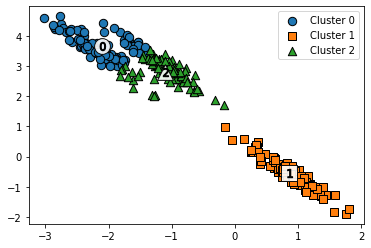

In [36]:
# 위의 데이터에 대해 kmeans의 군집화 방식
kmeans = KMeans(3, random_state=0)
kmeans_label = kmeans.fit_predict(X_aniso)
clusterdf['kmeans_label'] = kmeans_label

visualize_cluster_plot(kmeans, clusterdf, 'kmeans_label', iscenter=True)

C:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


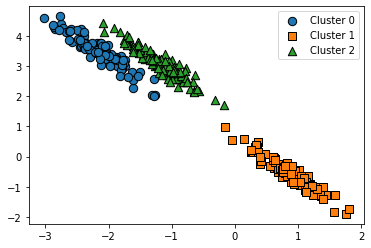

In [37]:
# GMM 버전
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm.fit(X_aniso).predict(X_aniso)
clusterdf['gmm_label'] = gmm_label

visualize_cluster_plot(gmm, clusterdf, 'gmm_label', iscenter=False)

In [39]:
print('### KMeans Clustering ###')
print(clusterdf.groupby('target')['kmeans_label'].value_counts())
print('\n### Gaussian Mixture Clustering ###')
print(clusterdf.groupby('target')['gmm_label'].value_counts())

### KMeans Clustering ###
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: kmeans_label, dtype: int64

### Gaussian Mixture Clustering ###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: gmm_label, dtype: int64


# 5. DBSCAN

DBSCAN은 특정 공간 내에 데이터 밀도차이를 기반 알고리즘으로 하고 있어 복잡한 기하학적 분포도를 가진 데이터셋에 대해서도 군집화를 잘 수행한다.

- epsilon : 개별 데이터를 중심으로 입살론 반경을 가지는 원형의 영역
- min points : 개별 데이터의 입실론 주변 영역에 포함되는 타 데이터의 개수
- Core Point : 주변 영역 내에 최소 데이터 개수 이상의 타 데이터를 가질 경우 해당 데이터를 핵심 포인트라고 함
- Neighbor Point : 주변 영역 내에 위치한 타 데이터를 이웃 포인트라 칭함
- Border Point : 주변 영역 내에 최소 데이터 개수 이상의 이웃 포인트를 가지진 않지만 핵심 포인트를 이웃 포인트로 가지고 있는 데이터를 경계 데이터라 칭함
- Noise Point : 최소 데이터 개수 이상의 이웃 포인트를 가지지 않으며, 핵심 포인트도 이웃 포인트로 가지지 않는 데이터를 잡음 포인트라 칭함


1. 각 데이터별로 epsilon 반경 내에 속한 데이터가 min points 값 이상이면 군집으로 지정한다.
2. 핵심포인트(센트로이드와 비슷)의 입실론 영역 내에 또 다른 핵심포인트가 있다면, 그 두 개의 군집은 합칠 수 있다.
3. 반복한다.

In [40]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisdf['dbscan_cluster'] = dbscan_labels
irisdf['target'] = iris.target

iris_result = irisdf.groupby('target')['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64


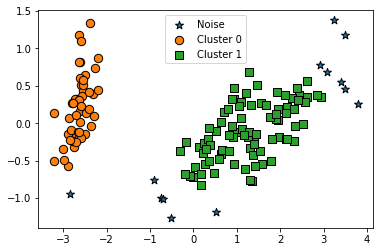

In [43]:
# DBSCAN은 특정 군집개수로 군집을 강제하지 않고 eps와 min_samples를 통해 자연스럽게 찾아가도록 유도하는 게 좋다.

from sklearn.decomposition import PCA
# 2차원으로 시각화하기 위해 PCA n_componets=2로 피처 데이터 세트 변환
pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)
# visualize_cluster_2d( ) 함수는 ftr1, ftr2 컬럼을 좌표에 표현하므로 PCA 변환값을 해당 컬럼으로 생성
irisdf['ftr1'] = pca_transformed[:,0]
irisdf['ftr2'] = pca_transformed[:,1]

visualize_cluster_plot(dbscan, irisdf, 'dbscan_cluster', iscenter=False)

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: dbscan_cluster, dtype: int64


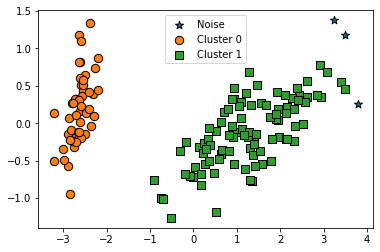

In [44]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisdf['dbscan_cluster'] = dbscan_labels
irisdf['target'] = iris.target

iris_result = irisdf.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisdf, 'dbscan_cluster', iscenter=False)

target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: dbscan_cluster, dtype: int64


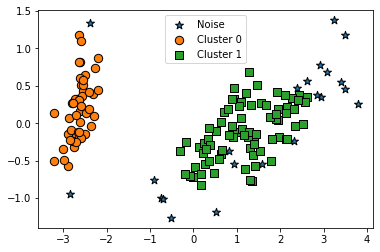

In [46]:
dbscan = DBSCAN(eps=0.6, min_samples=16, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisdf['dbscan_cluster'] = dbscan_labels
irisdf['target'] = iris.target

iris_result = irisdf.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)
visualize_cluster_plot(dbscan, irisdf, 'dbscan_cluster', iscenter=False)

# eps 값이 증가할 수록 노이즈는 줄어들음

### make_circles() 데이터 셋

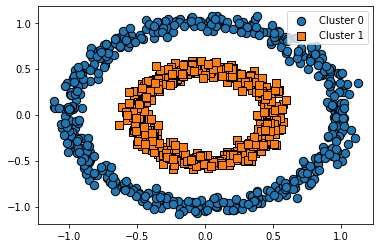

In [47]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5)
clusterdf = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterdf['target'] = y
visualize_cluster_plot(None, clusterdf, 'target', iscenter=False)

C:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


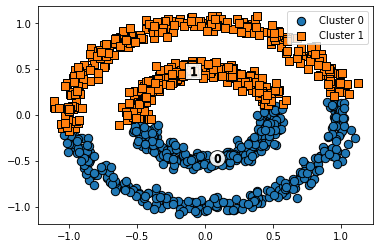

In [49]:
# kmeans로 적용
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_labels = kmeans.fit_predict(X)
clusterdf['kmeans_cluster'] = kmeans_labels

visualize_cluster_plot(kmeans, clusterdf, 'kmeans_cluster', iscenter=True)

C:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


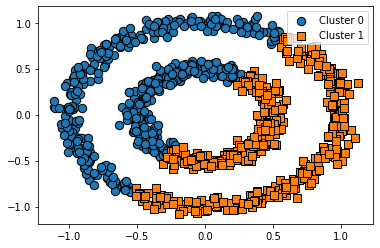

In [51]:
# GMM 적용
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=0)
gmm_label = gmm.fit(X).predict(X)
clusterdf['gmm_cluster'] = gmm_label

visualize_cluster_plot(gmm, clusterdf, 'gmm_cluster', iscenter=False)

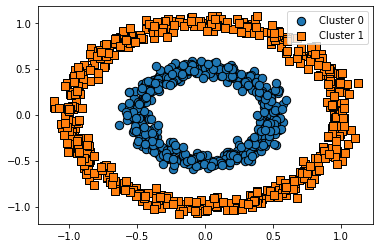

In [52]:
# DBSCAN 적용
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)
clusterdf['dbscan_cluster'] = dbscan_labels

visualize_cluster_plot(dbscan, clusterdf, 'dbscan_cluster', iscenter=False)